In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import math

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from zodiac.zodiac import Zodiac

In [10]:
#Load Data

data = load_breast_cancer()


In [11]:
df = pd.DataFrame(data = data.data,columns = data.feature_names)


In [12]:
df["Result"] = data.target

In [13]:
train, test = train_test_split(df, test_size=0.2)

In [14]:
train_x = train["Result"]

In [15]:
#Train the model

from sklearn.svm import SVC
del train["Result"]
clf = SVC(gamma='auto')
clf.fit(train, train_x) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
#Generate Predictions

res = test["Result"]
del test["Result"]
a = clf.predict(test)
len(a)

114

In [17]:
a

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [10]:
accuracy_score(a,res)

0.6228070175438597

In [11]:
#PCA

train_len = len(train)

data = pd.concat([train, test], axis=0)
data_labels = pd.concat([train_x, res], axis=0)

In [12]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])



In [13]:
principalDf['label'] = data_labels

In [14]:
#Split train test

train, test = principalDf.iloc[:train_len, :], principalDf.iloc[train_len:, :]

In [15]:
test['pred'] = a

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
def genXY(h,data):
    """
    generate x and y grid values of height h
    """
    minx = min(data['principal component 1']) - h
    maxx = max(data['principal component 1']) + h
    numDivX = round((maxx - minx)/h)
    print(numDivX)
    x_l = []
    x_l.append(minx)
    for i in range(1,numDivX+1):
        x_l.append((i*h) +minx)
    
    if(x_l[len(x_l)-1] != maxx):
        x_l.append(maxx)
        
        
    miny = min(data['principal component 2']) - h
    maxy = max(data['principal component 2']) + h
    numDivY = round((maxy - miny)/h)
    print(numDivY)
    y_l = []
    y_l.append(miny)
    for i in range(1,numDivY+1):
        y_l.append((i*h) + miny)
    
    if(y_l[len(y_l)-1] != maxy):
        y_l.append(maxy)
    
    return x_l,y_l
        

In [17]:
#Grid size for test

max_1 = test.loc[test['principal component 1'].idxmax()]['principal component 1']

max_2 = test.loc[test['principal component 2'].idxmax()]['principal component 2']

min_1 = test.loc[test['principal component 1'].idxmin()]['principal component 1']

min_2 = test.loc[test['principal component 2'].idxmin()]['principal component 2']

x_axis = round((max_1 - min_1)/10)

y_axis = round((max_2-min_2)/10)

x_axis = x_axis.as_integer_ratio()[0]

y_axis = y_axis.as_integer_ratio()[0]

In [18]:
x_l = []
y_l = []
for i in range(0,11):
    x_l.append(round(min_1 + x_axis*i))

for i in range(0,11):
    y_l.append(round(min_2 + y_axis*i))


In [19]:
x_l_1, y_l_1 = genXY(100,test)

37
16


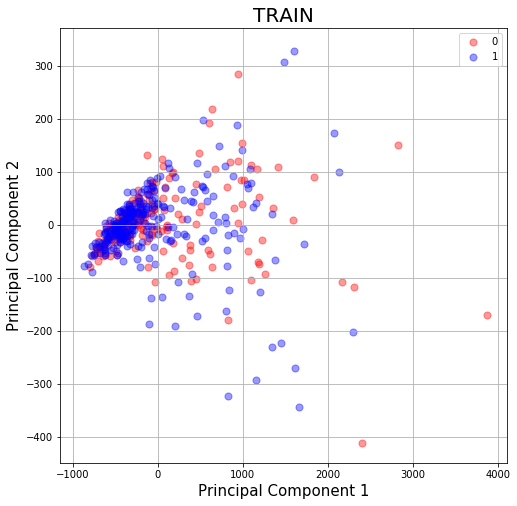

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('TRAIN', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = train['label'] == target
    ax.scatter(train.loc[indicesToKeep, 'principal component 1']
               , train.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
              , alpha = 0.4)
ax.legend(targets)
ax.grid()


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


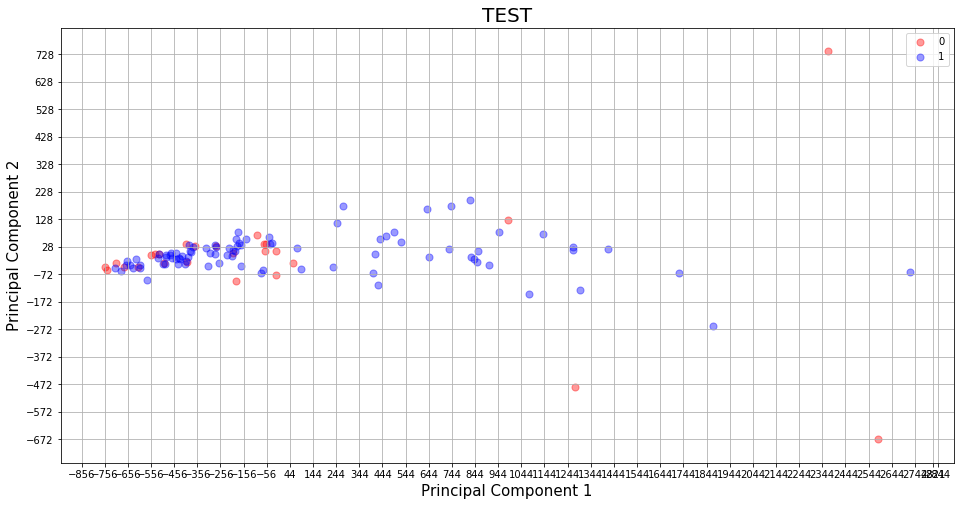

In [21]:
fig = plt.figure(figsize = (16,8))
plt.xticks(x_l_1)
plt.yticks(y_l_1)
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('TEST', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = test['label'] == target
    ax.scatter(test.loc[indicesToKeep, 'principal component 1']
               , test.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
              , alpha = 0.4)
ax.legend(targets)
ax.grid()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


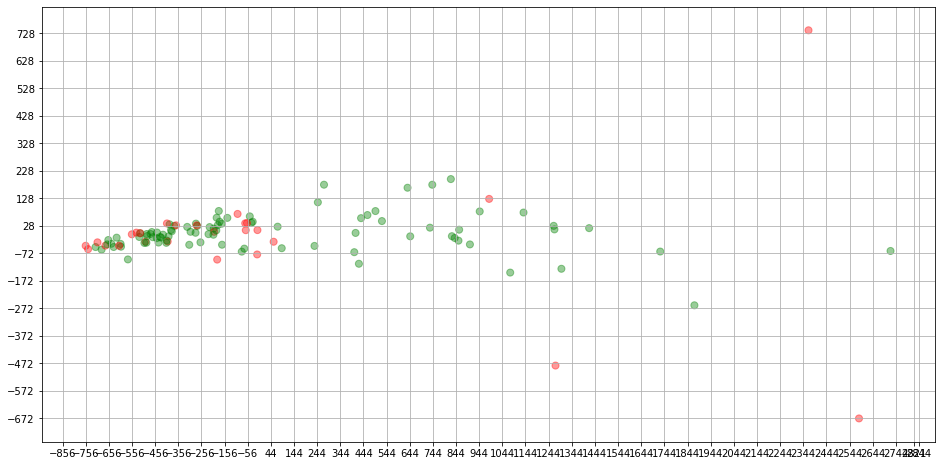

In [22]:
test["color"] = test["label"] == test["pred"]
c = []
for i in test["color"]:
    if i:
        c.append('g')
    else:
        c.append('r')

fig = plt.figure(figsize = (16,8))
plt.xticks(x_l_1)
plt.yticks(y_l_1)
ax = fig.add_subplot(1,1,1) 
ax.scatter(test['principal component 1']
               , test['principal component 2']
               , c = c
               , s = 50
              , alpha = 0.4)

ax.grid()

In [23]:
def inWindows(x1,x2,y1,y2,x,y):
    if (x >= x1 and x < x2) and (y>=y1 and y<y2):
        return True
    return False

In [32]:
def genDensityMetric(data,x_l,y_l):
    """
     get count of data points in a grid line and accuracy percentage
    """
    densityMap = []
    count = len(data)
    for x in range(len(x_l)-1):
        for y in range(len(y_l)-1):
            results = []
            preds = []
            density = 0
            for i in data.values:
                if(inWindows(x_l[x],x_l[x+1],y_l[y],y_l[y+1],i[0],i[1])):
                    results.append(i[3])
                    preds.append(i[2])
                    density = density + 1
            if density != 0:
                f1 = f1_score(results,preds)
                acc = accuracy_score(results,preds)
                rec = recall_score(results,preds)
                prec = precision_score(results,preds)
                densityMap.append([x_l[x],x_l[x+1],y_l[y],y_l[y+1],density,density/count,acc,f1,rec,prec])
    dm = pd.DataFrame(data = densityMap, columns=['x1','x2','y1','y2','num pts','density','accuracy score','f1 score','recall score','precision score'])
    return dm
            

In [33]:
densityMap = genDensityMetric(test,x_l_1,y_l_1)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
densityMap.sort_values(by=['x1'],ascending=True)

,x1,x2,y1,y2,num pts,density,accuracy score,f1 score,recall score,precision score
0,-755.967624,-655.967624,-71.532263,28.467737,8,0.070175,0.500000,0.666667,0.500000,1.0
1,-655.967624,-555.967624,-171.532263,-71.532263,1,0.008772,1.000000,1.000000,1.000000,1.0
2,-655.967624,-555.967624,-71.532263,28.467737,7,0.061404,0.714286,0.833333,0.714286,1.0
3,-555.967624,-455.967624,-71.532263,28.467737,12,0.105263,0.750000,0.857143,0.750000,1.0
4,-455.967624,-355.967624,-71.532263,28.467737,13,0.114035,0.923077,0.960000,0.923077,1.0
5,-455.967624,-355.967624,28.467737,128.467737,3,0.026316,0.333333,0.500000,0.333333,1.0
6,-355.967624,-255.967624,-71.532263,28.467737,6,0.052632,1.000000,1.000000,1.000000,1.0
7,-355.967624,-255.967624,28.467737,128.467737,2,0.017544,0.500000,0.666667,0.500000,1.0
9,-255.967624,-155.967624,-71.532263,28.467737,7,0.061404,0.857143,0.923077,0.857143,1.0
10,-255.967624,-155.967624,28.467737,128.467737,5,0.043860,1.000000,1.000000,1.000000,1.0


## Alpha as a function of accuracy score (scale of 0.01 to 0.4)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


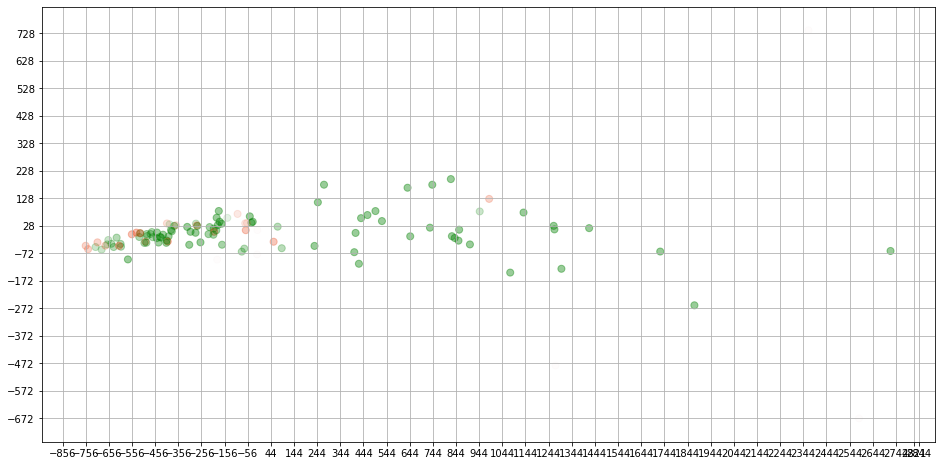

In [35]:


def genAlpha(x,y,test,grid,ind):
    a = []
    maxval = max(grid[ind])
    minval = min(grid[ind])
    
    for k in test.values:
        #print("hi")
        ip = grid.loc[(grid['x1']<=k[0]) & (grid['x2']>k[0]) & (grid['y1']<=k[1]) & (grid['y2']>k[1])][ind].values[0]
        op = 0.01 + ((0.39/(maxval-minval)) * (ip-minval)) #mapping it to alpha range 0.1 to 0.8
        a.append(op)
        #a.append(grid.loc[(grid['x1']<=k[0]) & (grid['x2']>k[0]) & (grid['y1']<=k[1]) & (grid['y2']>k[1])][ind])
    return a

a = genAlpha(x_l_1,x_l_1,test,densityMap,"accuracy score")

test["color"] = test["label"] == test["pred"]
c = []
k = 0
for i in test["color"]:
    if i:
        c.append([0,0.5,0,a[k]])
    else:
        c.append([0.9,0.2,0,a[k]])
    k = k +1

fig = plt.figure(figsize = (16,8))
plt.xticks(x_l_1)
plt.yticks(y_l_1)
ax = fig.add_subplot(1,1,1) 
ax.scatter(test['principal component 1']
               , test['principal component 2']
               , c = c
               , s = 50)

ax.grid()

## Alpha as a function of density (scale of 0.01 to 0.4)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


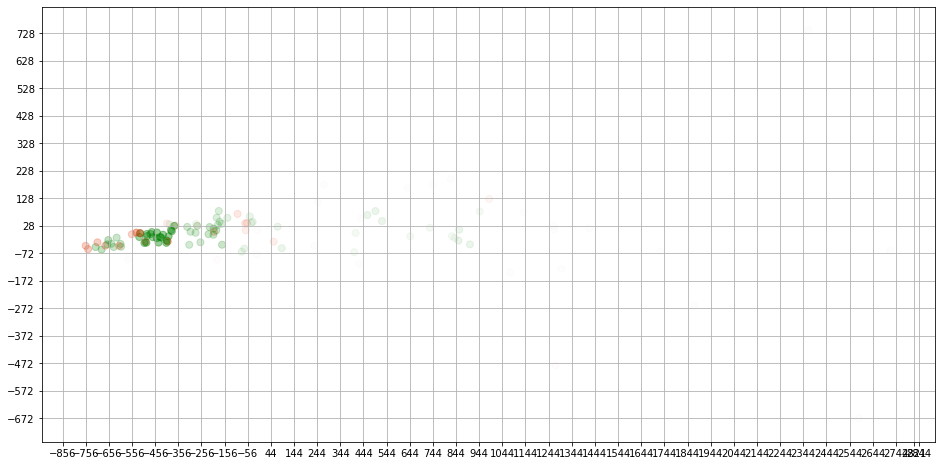

In [37]:
a = genAlpha(x_l_1,x_l_1,test,densityMap,"density")

test["color"] = test["label"] == test["pred"]
c = []
k = 0
for i in test["color"]:
    if i:
        c.append([0,0.5,0,a[k]])
    else:
        c.append([0.9,0.2,0,a[k]])
    k = k +1

fig = plt.figure(figsize = (16,8))
plt.xticks(x_l_1)
plt.yticks(y_l_1)
ax = fig.add_subplot(1,1,1) 
ax.scatter(test['principal component 1']
               , test['principal component 2']
               , c = c
               , s = 50)

ax.grid()

## Alpha as a function of f1

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


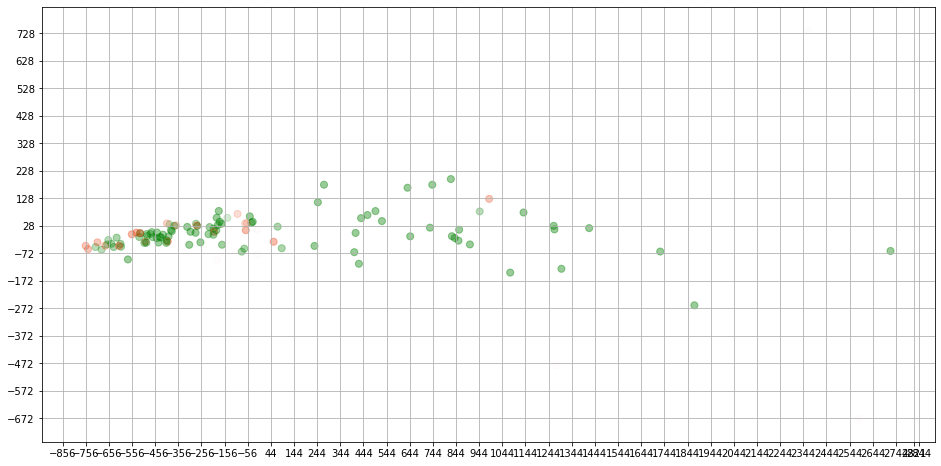

In [38]:
a = genAlpha(x_l_1,x_l_1,test,densityMap,"f1 score")

test["color"] = test["label"] == test["pred"]
c = []
k = 0
for i in test["color"]:
    if i:
        c.append([0,0.5,0,a[k]])
    else:
        c.append([0.9,0.2,0,a[k]])
    k = k +1

fig = plt.figure(figsize = (16,8))
plt.xticks(x_l_1)
plt.yticks(y_l_1)
ax = fig.add_subplot(1,1,1) 
ax.scatter(test['principal component 1']
               , test['principal component 2']
               , c = c
               , s = 50)

ax.grid()

## Alpha as a function of precision

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


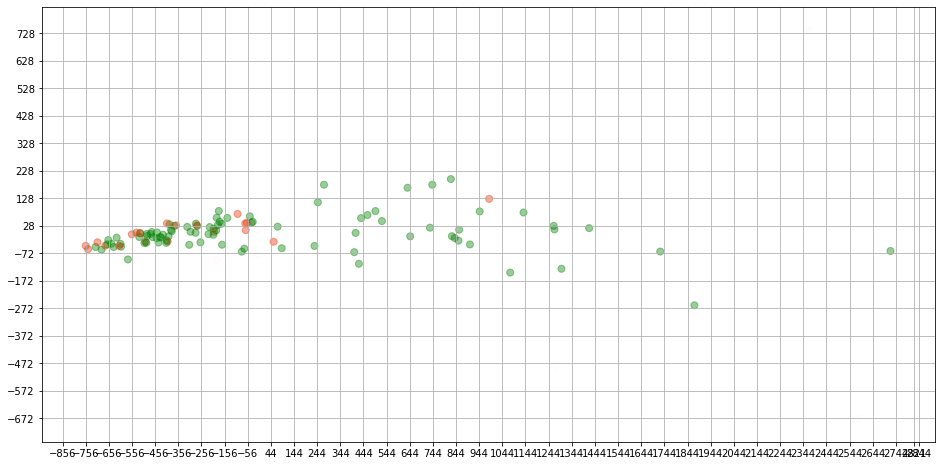

In [39]:
a = genAlpha(x_l_1,x_l_1,test,densityMap,"precision score")

test["color"] = test["label"] == test["pred"]
c = []
k = 0
for i in test["color"]:
    if i:
        c.append([0,0.5,0,a[k]])
    else:
        c.append([0.9,0.2,0,a[k]])
    k = k +1

fig = plt.figure(figsize = (16,8))
plt.xticks(x_l_1)
plt.yticks(y_l_1)
ax = fig.add_subplot(1,1,1) 
ax.scatter(test['principal component 1']
               , test['principal component 2']
               , c = c
               , s = 50)

ax.grid()

## Alpha as a function of recall

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


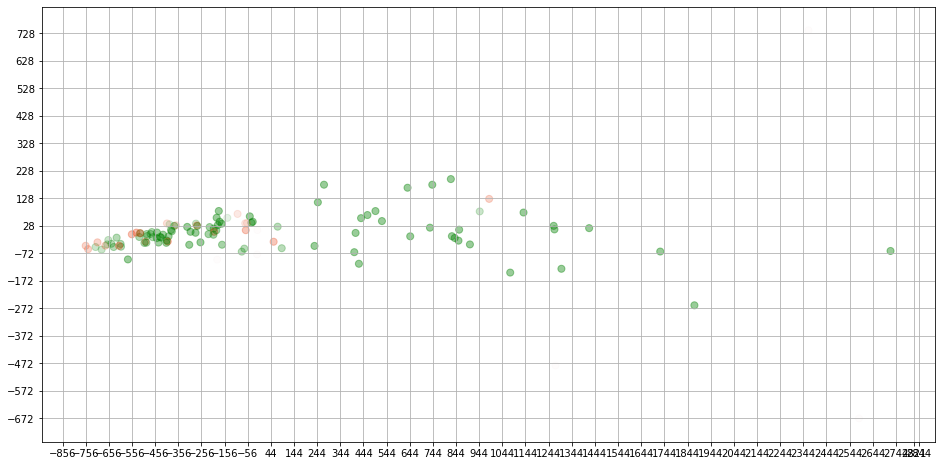

In [40]:
a = genAlpha(x_l_1,x_l_1,test,densityMap,"recall score")

test["color"] = test["label"] == test["pred"]
c = []
k = 0
for i in test["color"]:
    if i:
        c.append([0,0.5,0,a[k]])
    else:
        c.append([0.9,0.2,0,a[k]])
    k = k +1

fig = plt.figure(figsize = (16,8))
plt.xticks(x_l_1)
plt.yticks(y_l_1)
ax = fig.add_subplot(1,1,1) 
ax.scatter(test['principal component 1']
               , test['principal component 2']
               , c = c
               , s = 50)

ax.grid()